# USA Car Accidents Severity Prediction

by Jinz Wang

May 29, 2020 (updated on Feb 22, 2021)



# 0 INTRODUCTION

### Motivation

The economic and societal impact of traffic accidents cost U.S. citizens hundreds of billions of dollars every year. And a large part of losses is caused by a small number of serious accidents. Reducing traffic accidents, especially serious accidents, is nevertheless always an important challenge. The proactive approach, one of the two main approaches for dealing with traffic safety problems, focuses on preventing potential unsafe road conditions from occurring in the first place. For the effective implementation of this approach, accident prediction and severity prediciton are critical.
If we can identify the patterns of how these serious accidents happen and the key factors, we might be able to implement well-informed actions and better allocate financial and human resources. 

### Objectives

The first objective of this project is to recognize **key factors affecting the accident severity**. The second one is to develop a model that can **accurately predict accident severity**. To be specific, for a given accident, without any detailed information about itself, like driver attributes or vehicle type, this model is supposed to be able to predict the likelihood of this accident being a severe one. The accident could be the one that just happened and still lack of detailed information, or a potential one predicted by other models. Therefore, with the sophisticated real-time traffic accident prediction solution developed by the creators of the same dataset used in this project, this model might be able to further predict severe accidents in real-time.

### Process

Data cleaning was first performed to detect and handle corrupt or missing records. EDA (Exploratory Data Analysis) and feature engineering were then done over most features. Finally, Logistic regression, Random Forest Classifier, and EasyEnsemble were used to develop the predictive model.   

It is worth noting that the severity in this project is "**an indication of the effect the accident has on traffic**", rather than the injury severity that has already been thoroughly studied by many articles. Another thing is that the final model is dependent on only **a small range of data attributes** that are **easily achievable** for all regions in the United States and before the accident really happened. 

### Key Findings
* Country-wide accident severity can be accurately predicted with limited data attributes (location, time, weather, and POI).
* **Minute(frequency-encoding)** is the most useful feature. An accident is more likely to be a serious one when accidents happen less frequently at this time.
* Spatial patterns are also very important. For small areas like **street** and **zipcode**, severe accidents are more likely to happen at places having more accidents while for larger areas like **city** and **airport region**, at places having less accident.
* **Pressure** is top fourth important feature in the random-forest model and there is negative correlation between pressure and severity.
* If an accident happens on **Interstate Highway**, there is a 2% chance that it will be a serious one, which is about 2.3 times of average and higher than any other street type. 
* An accident is much less likely to be severe if it happens near **traffic signal** while more likely if near **junction**.

### Dataset Overview

US-Accident dataset is a countrywide car accident dataset, which covers **49 states of the United States**. It contains more than **4 million cases** of traffic accidents that took place from **February 2016 to December 2020**. In this project, however, only the data of accidents that happened after **February 2019** and were reported by *MapQuest* was finally used in exploration analysis and modeling so that irrelevant factors can be eliminated to the greatest extent.

Link for kaggle dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents

### Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “<a href="https://arxiv.org/abs/1906.05409">A Countrywide Traffic Accident Dataset.</a>”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "<a href="https://arxiv.org/abs/1909.09638">Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.</a>" In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### Refrences

I found these notebooks really helpful:

<a href="https://towardsdatascience.com/usa-accidents-data-analysis-d130843cde02">USA Accidents Data Analysis</a>

https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055

<a href="https://www.kaggle.com/deepakdeepu8978/how-severity-the-accidents-is">how Severity the Accidents is ?</a>

<a href="https://www.kaggle.com/trivenisaraswathi/severity-prediction-in-sfo-bay-area">Severity Prediction in SFO Bay Area</a> 

<a href="https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont"> ML to Predict Accident Severity_PA_Mont</a>

<a href="https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis"> severity and hours wasted</a>

<a href="https://www.kaggle.com/nikitagrec/usa-accidents-plotly-maps-text-classification"> USA Accidents Plotly maps + text classification </a>



### Tabel of content
1. [OVERVIEW & PREPROCESSING](#1) 
    
    1.1 [Overview](#1.1) 
    
    1.2 [Reporting Source](#1.2)
    
    1.3 [Useless Features](#1.3)
    
    1.4 [Clean Up Categorical Features](#1.4)
    
    1.5 [Fix Datetime Format](#1.5)
    
    <br>    
2. [HANDLING MISSING DATA](#2)

    2.1 [Drop Features](#2.1)
    
    2.2 [Separate Feature](#2.2)
    
    2.3 [Drop NaN](#2.3)
    
    2.4 [Value Imputation](#2.4)
    
    <br>    
3. [EXPLORATION & ENGINEERING](#3)
    
    3.1 [Resampling](#3.1)
    
    3.2 [Time Features](#3.2)
    
    3.3 [Address Features](#3.3)
    
    3.4 [Weather Features](#3.4)
    
    3.5 [POI Features](#3.5)
    
    3.6 [Correlation](#3.6)
    
    3.7 [One-hot Encoding](#3.7)
    
    <br>
4. [MODEL](#4)
    
    4.1 [Train Test Split](#4.1)
    
    4.2 [Logistic regression with balanced class weights](#4.2)
    
    4.3 [Random Forest](#4.3)
    
    4.4 [EasyEnsemble](#4.4)  
    
    4.5 [BalanceCascade](#4.5)
    
    <br>
5. [FUTURE WORK](#5)

<a id="1"></a>
# 1 OVERVIEW & PREPROCESSING

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

<a id="1.1"></a>
## 1.1 Overview the dataset
Details about features in the dataset:

**Traffic Attributes (12)**:

* **ID**: This is a unique identifier of the accident record.

* **Source**: Indicates source of the accident report (i.e. the API which reported the accident.).

* **TMC**: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.

* **Description**: Shows natural language description of the accident.

**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [2]:
df = pd.read_csv('../input/us-accidents/US_Accidents_March23.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


<a id="1.2"></a>
## 1.2 Reporting Sources
    
These data came from two sources, *MapQuest* and *Bing*, both of which report severity level but in a different way. Bing has 4 levels while MapQuest has 5. And according to dataset creator, there is no way to do a 1:1 mapping between them. Since severity is what we really care about in this project, I think it is crucial to figure out the difference.

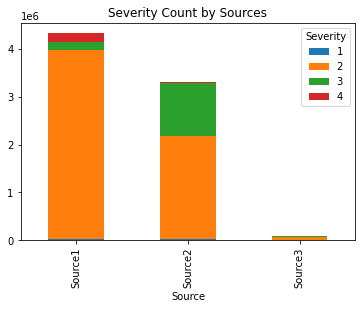

In [3]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

The stacked bar chart shows that two data providers reported totally different proportions of accidents of each level. *MapQuest* reported so rare accidents with severity level 4 which can not even be seen in the plot, whereas *Bing* reported almost the same number of level 4 accidents as level 2. Meanwhile, *MapQuest* reported much more level 3 accidents than *Bing* in terms of proportion. These differences may be due to the different kinds of accidents they tend to collect or the different definitions of severity level, or the combination of them. If the latter is the case, I don't think we can use the data from both of them at the same time. To check it out, we can examine the distribution of accidents with different severity levels across two main measures, **Impacted Distance** and **Duration**.


In [4]:
# fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

# calculate duration as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  444.466 min


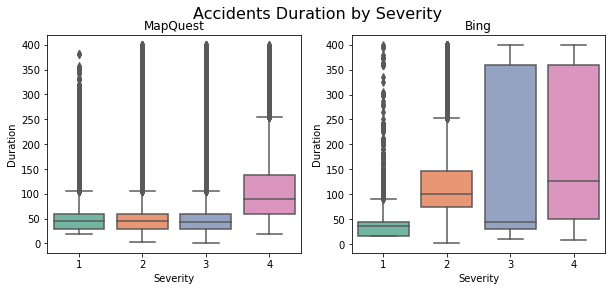

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Source2") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Source1") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

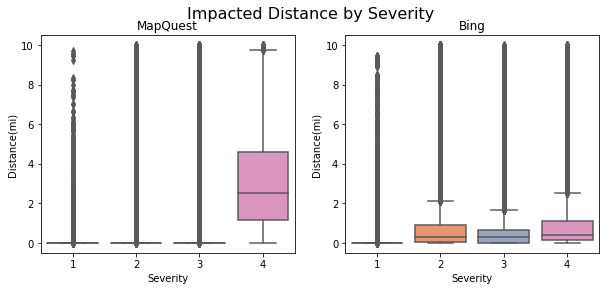

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="Source2") & (df['Distance(mi)']<10),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Source1") & (df['Distance(mi)']<10),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

Two differences are obvious in the above plots. The first is that the overall duration and impacted distance of accidents reported by *Bing* are much longer than those by *MapQuest*. Second, same severity level holds different meanings for *MapQuest* and *Bing*. *MapQuest* seems to have a clear and strict threshold for severity level 4, cases of which nevertheless only account for a tiny part of the whole dataset. *Bing*, on the other hand, doesn't seem to have a clear-cut threshold, especially regards duration, but the data is more balanced. 

It is hard to choose one and we definitely can't use both. I decided to select *MapQuest* because serious accidents are we really care about and the sparse data of such accidents is the reality we have to confront.

Finally, drop data reported from *Bing* and 'Source' column.

In [7]:
df = df.loc[df['Source']=="Source2",]
df = df.drop(['Source'], axis=1)
print("The shape of data is:",(df.shape))

The shape of data is: (3305373, 46)


<a id="1.3"></a>    
## 1.3 Useless Features
Features 'ID' doesn't provide any useful information about accidents themselves. 'TMC', 'Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.



In [8]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time', 'Duration', 
              'End_Lat', 'End_Lng'], axis=1)

Check out some categorical features.

In [9]:
cat_names = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


Drop 'Country' and 'Turning_Loop' for they have only one class.

In [10]:
df = df.drop(['Country','Turning_Loop'], axis=1)

<a id="1.4"></a>
## 1.4 Clean Up Categorical Features
If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.

### Wind Direction

In [11]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


Simplify wind direction

In [12]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


### Weather Condition
Weather-related vehicle accidents kill more people annually than large-scale weather disasters(source: weather.com). According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.


In [13]:
# show distinctive weather conditions 
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 

Create features for some common weather conditions and drop 'Weather_Condition' then.

In [14]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [15]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

<a id="1.5"></a>
## 1.5 Fix Datetime Format

In [16]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:33.576478


Since the 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

In [17]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


<a id="2"></a>
# 2 HANDLING MISSING DATA
<a id="2.1"></a>
## 2.1 Drop Features
As seen from below, many columns have missing values.

In [18]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Street,0.049162
5,City,0.001845
8,Zipcode,0.013191
9,Timezone,0.084680
10,Airport_Code,0.196226
11,Temperature(F),1.683471
12,Wind_Chill(F),43.565643
13,Humidity(%),1.798980
14,Pressure(in),1.442046
15,Visibility(mi),1.924957


More than 60% percent of 'Number', 'Wind_Chill(F)', and 'Precipitation(in)' is missing. Drop na and value imputation wouldn't work for these features. 'Number' and 'Wind_Chill(F)' will be dropped because they are not highly related to severity according to previous research, whereas 'Precipitation(in)' could be a useful predictor and hence can be handled by separating feature.

Drop these features:

 1. 'Number'

 2. 'Wind_Chill(F)'


In [19]:
df = df.drop(['Wind_Chill(F)'], axis=1)

<a id="2.2"></a>
## 2.2 Separate Featrue
Add a new feature for missing values in 'Precipitation(in)' and replace missing values with median.


In [20]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


<a id="2.3"></a>
## 2.3 Drop NaN
The counts of missing values in some features are much smaller compared to the total sample. It is convenient to drop rows with missing values in these columns.

Drop NAs by these features:

1. 'City'
2. 'Zipcode'
3. 'Airport_Code'
4. 'Sunrise_Sunset'
5. 'Civil_Twilight'
6. 'Nautical_Twilight'
7. 'Astronomical_Twilight'

In [21]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

<a id="2.4"></a>
## 2.4 Value Imputation
Most of the rest columns only have small missing part that can be filled. (It is not absolutely necessary though, we can also just drop na)
### Continuous Weather Data
Continuous weather features with missing values:

1. Temperature(F)

2. Humidity(%)

3. Pressure(in)

4. Visibility(mi)

5. Wind_Speed(mph)

Before imputation, weather features will be grouped by location and time first, to which weather is naturally related. 'Airport_Code' is selected as location feature because the sources of weather data are airport-based weather stations. Then the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by median value of each group. 

In [22]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 6247
Humidity(%) : 6270
Pressure(in) : 6224
Visibility(mi) : 14298
Wind_Speed(mph) : 14238


There still are some missing values but much less. Just dropna by these features for the sake of simplicity.

In [23]:
df = df.dropna(subset=Weather_data)

### Categorical Weather Features
For categorical weather features, majority rather than median will be used to replace missing values.

In [24]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

# drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 10402
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


<a id="3"></a>
# 3 EXPLORATION & ENGINEERING
<a id="3.1"></a>
## 3.1 Resampling
Based on the exploration we did in 1.2, the accidents with severity level 4 are much more serious than accidents of other levels, between which the division is far from clear-cut. Therefore, I decided to focus on level 4 accidents and regroup the levels of severity into level 4 versus other levels. 

In [25]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    3258507
1      13939
Name: Severity4, dtype: int64

As seen from above, the data is so unbalanced that we can hardly do exploratory analysis. To address this issue, the combination of over- and under-sampling will be used since the dataset is large enough. level 4 will be randomly oversampled to 50000 and other levels will be randomly undersampled to 50000.

In [26]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [27]:
df_bl = resample(df, 'Severity4', 50000)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 1    50000
0    50000
Name: Severity4, dtype: int64


Then we can do some exploratoty analysis on resampled data. 

<a id="3.2"></a>
## 3.2 Time Features
### Year

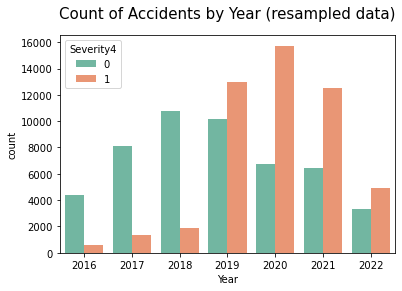

In [28]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

There must be something wrong. It is impossible that the number of accidents with severity level 4 after 2018 is 5 times more than the number before 2018 while the number of other levels accidents is less. Let's back to raw data to have a look.

I created a heatmap of accidents with severity level 4 from 2016 to 2020, seeing how they actually distributed.

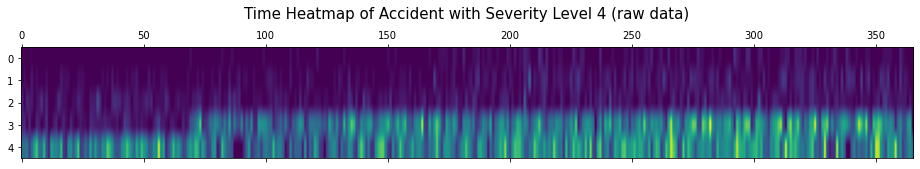

In [29]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2020
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2020-12-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    if name.year != 2020:
        years[name.year] = np.append(group.values,0)
    else:
        years[name.year] = group.values
  

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

The heatmap indicates that something changed after Feb 2019. Maybe it is the way that *MapQuest* defines severity or the way they collect data. Anyway, we have to narrow down our data again. Since the data after Feb 2019 is less imbalanced and the data in the future is more likely to look like this, dropping the data before Mar 2019 may be the best choice.

In [30]:
df = df.loc[df['Start_Time'] > "2019-03-10",:]
df = df.drop(['Year', 'Start_Time'], axis=1)
df['Severity4'].value_counts()

0    1608398
1      12751
Name: Severity4, dtype: int64


### Month
It's quite interesting that the count of other levels accidents is mostly consistent from March to December, whereas the number of level 4 accidents rapidly increased from March to May and remained stable until September then increased again from October.   

In [31]:
df_bl = resample(df, 'Severity4', 20000)

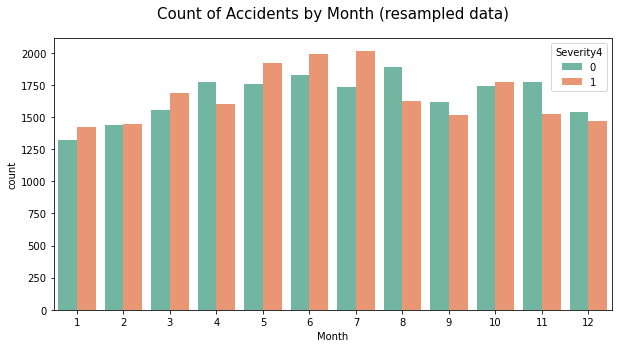

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

### Weekday
The number of accidents was much less on weekends while the proportion of level 4 accidents was higher.

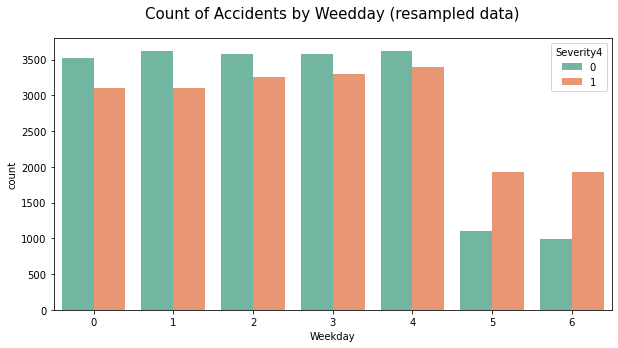

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weedday (resampled data)', size=15, y=1.05)
plt.show()

### Period-of-Day
Accidents were less during the night but were more likely to be serious.

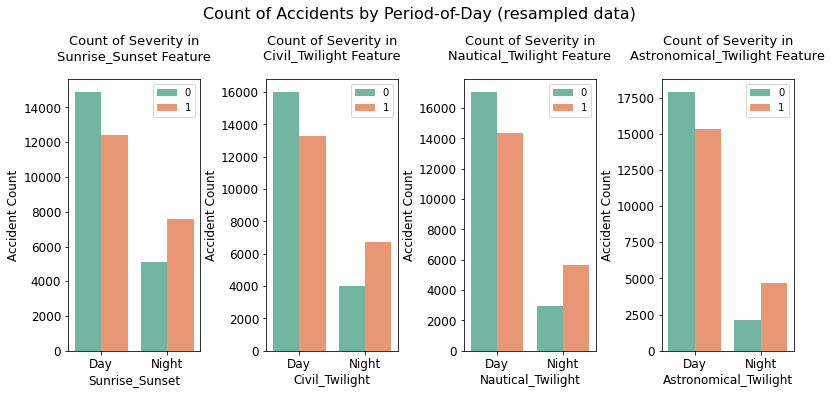

In [34]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=16)
plt.show()

### Hour
Most accidents happened during the daytime, especially AM peak and PM peak. When it comes to night, accidents were far less but more likely to be serious.

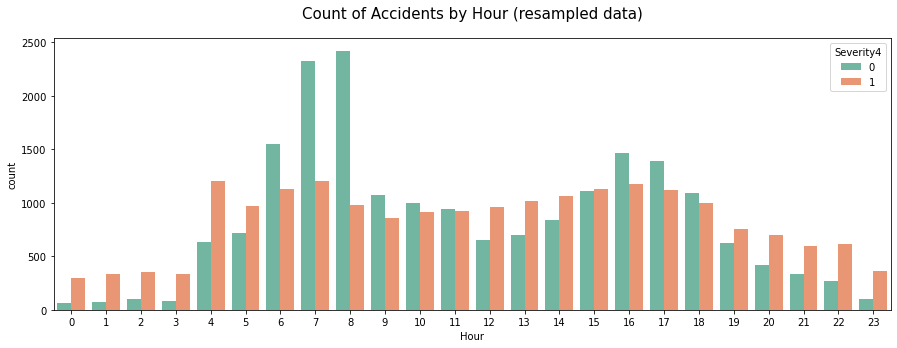

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

### Frequence Encoding (Minute)
As seen in the plot of 'Hour', 'Minute' may also be an important predictor. But directly using it would produce an overabundance of dummy variables. Therefore, the frequency of 'Minute' was utilized as labels, rather than 'Minute' itself. To normalize the distribution, the frequency was also transformed by log.

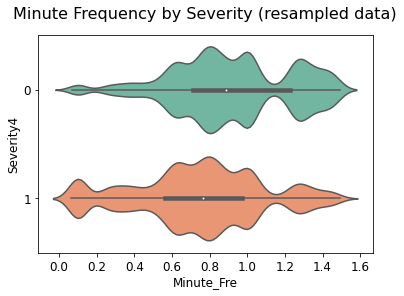

In [36]:
# frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

# resampling
df_bl = resample(df, 'Severity4', 20000)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")    
plt.xlabel('Minute_Fre', size=12, labelpad=3)
plt.ylabel('Severity4', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity (resampled data)', size=16, y=1.05)
plt.show()

The violin plot shows that the overall minute frequency of accidents with severity level 4 is less than other levels. In other words, an accident is more likely to be a serious one when accidents happen less frequently.

<a id="3.3"></a>
## 3.3 Address Features
### Timezone
Eastern time zone is the most dangeous one.

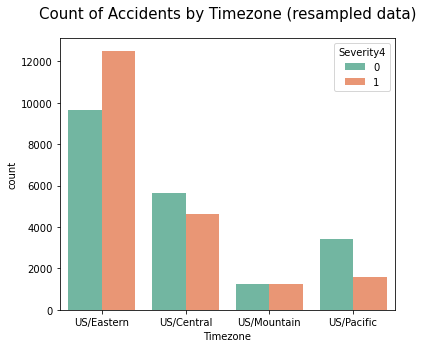

In [37]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone (resampled data)", size=15, y=1.05)
plt.show()

### State
FL, CA, and TX are the top 3 states with the most accidents.

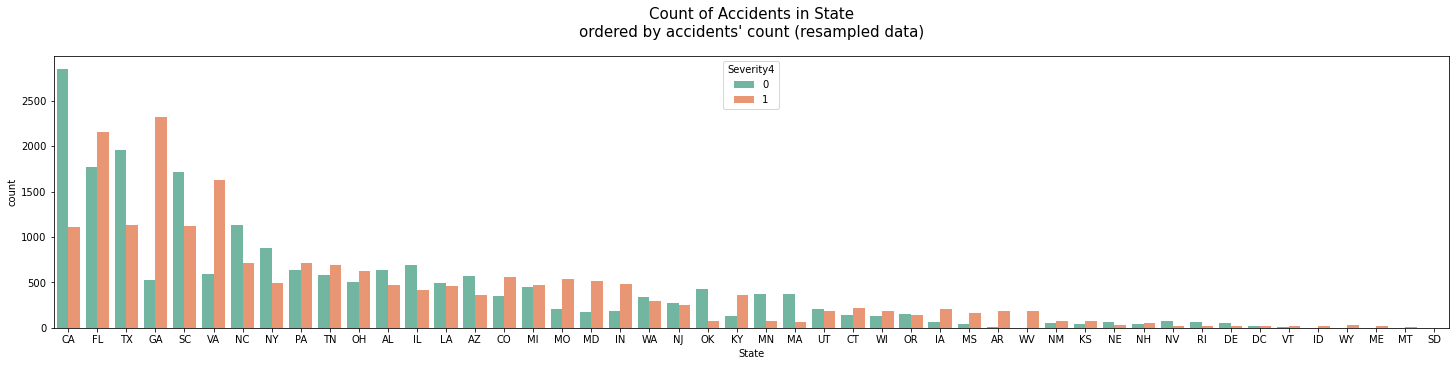

In [38]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

It is a different story if we order the plot by the count of accidents with severity of level 4. FL is still the top one but the next two are GA and VA.

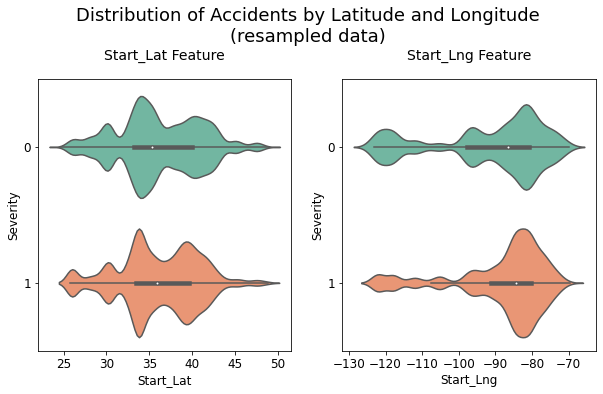

In [39]:
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=18,y=1.08)
plt.show()

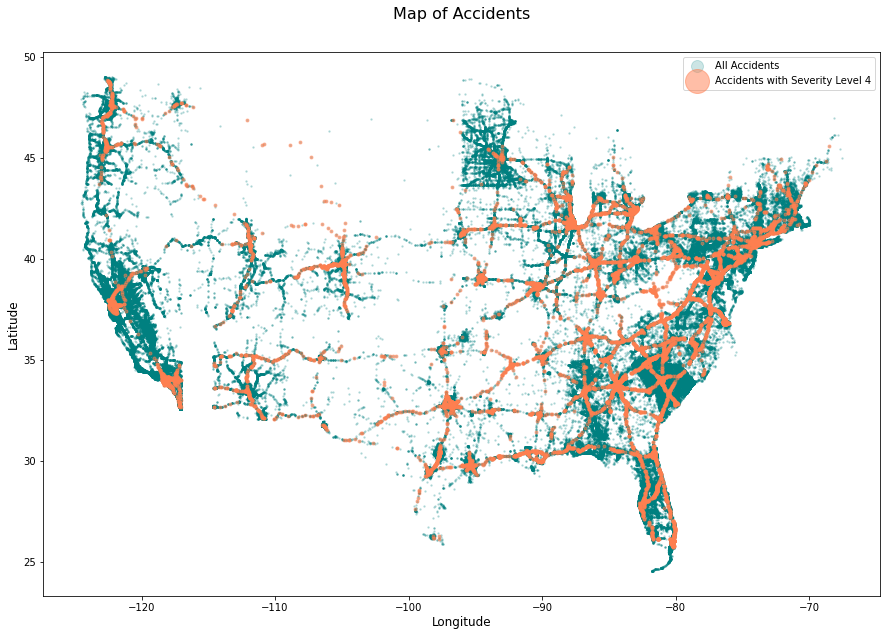

In [40]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Severity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

In [41]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

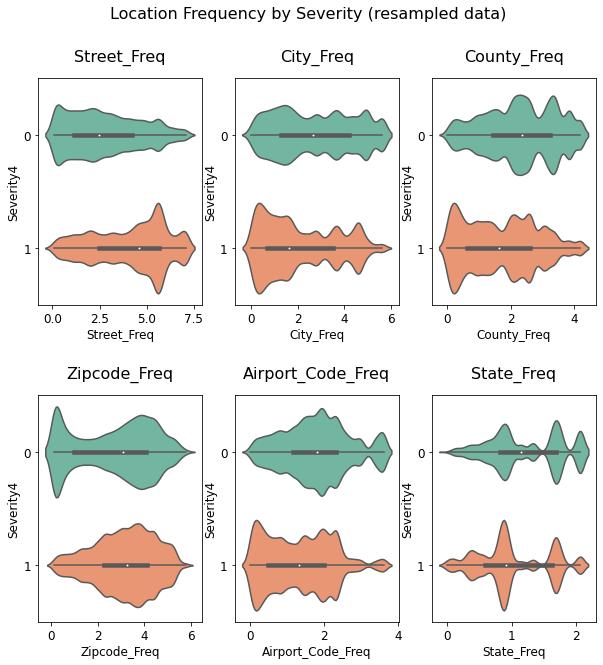

In [42]:
# resample again
df_bl = resample(df, 'Severity4', 50000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Location Frequency by Severity (resampled data)', fontsize=16)
for i, feature in enumerate(fre_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity4', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
plt.show()

In [43]:
df = df.drop(fre_list, axis  = 1)

In [44]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=0.3)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

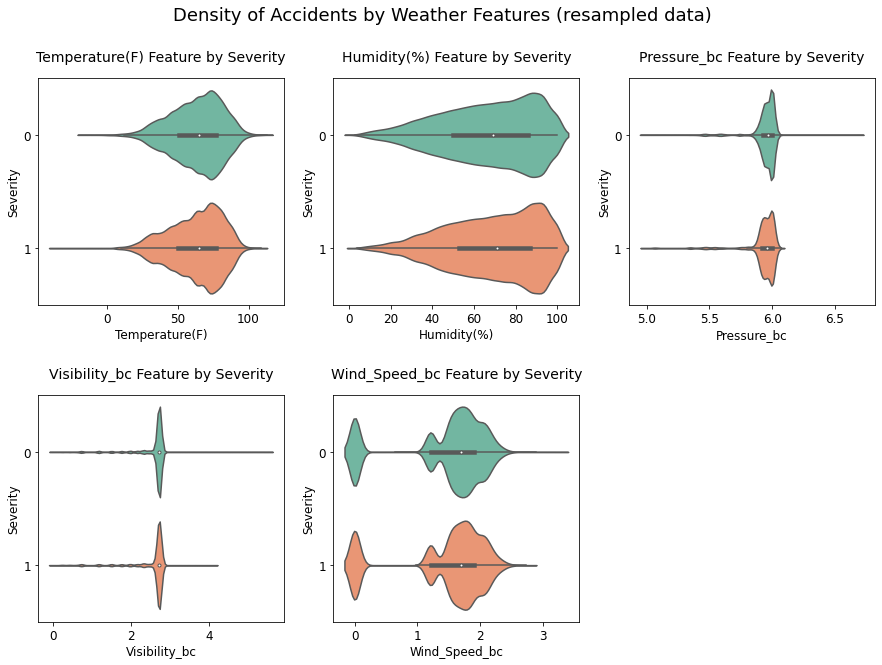

In [45]:
# resample again
df_bl = resample(df, 'Severity4', 50000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

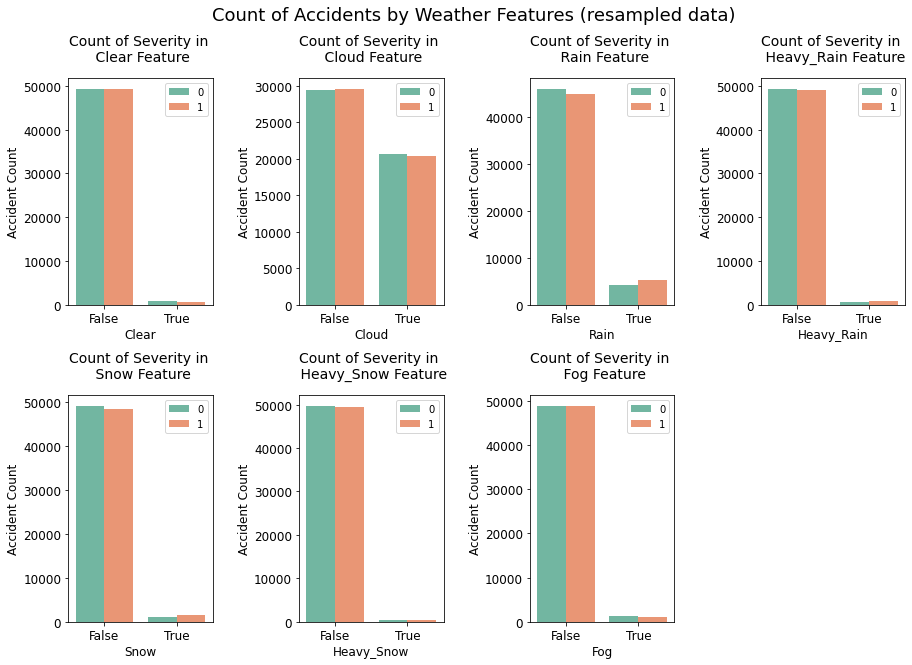

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

In [47]:
df = df.drop(['Heavy_Rain','Heavy_Snow','Fog'], axis  = 1)

In [48]:
df = df.drop(['Wind_Direction'], axis=1)

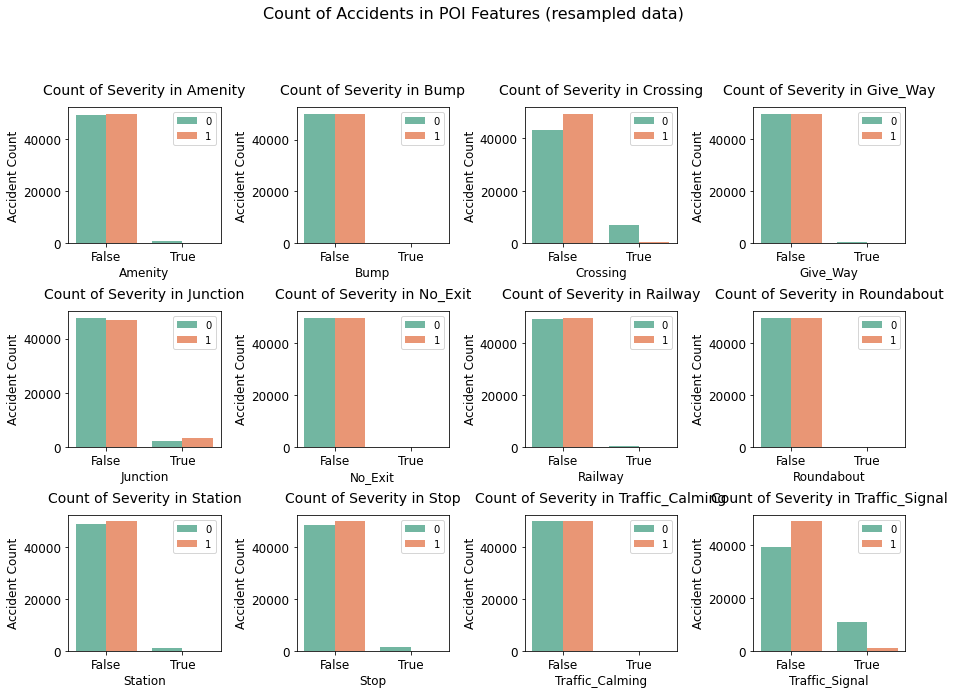

In [49]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

In [50]:
df = df.drop(['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [51]:
dtype_df = df_bl.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,Start_Lat,float64
1,Start_Lng,float64
2,Timezone,object
3,Temperature(F),float64
4,Humidity(%),float64
5,Wind_Direction,object
6,Precipitation(in),float64
7,Amenity,bool
8,Bump,bool
9,Crossing,bool


In [52]:
# one-hot encoding
df[period_features] = df[period_features].astype('category')
df = pd.get_dummies(df, columns=period_features, drop_first=True)

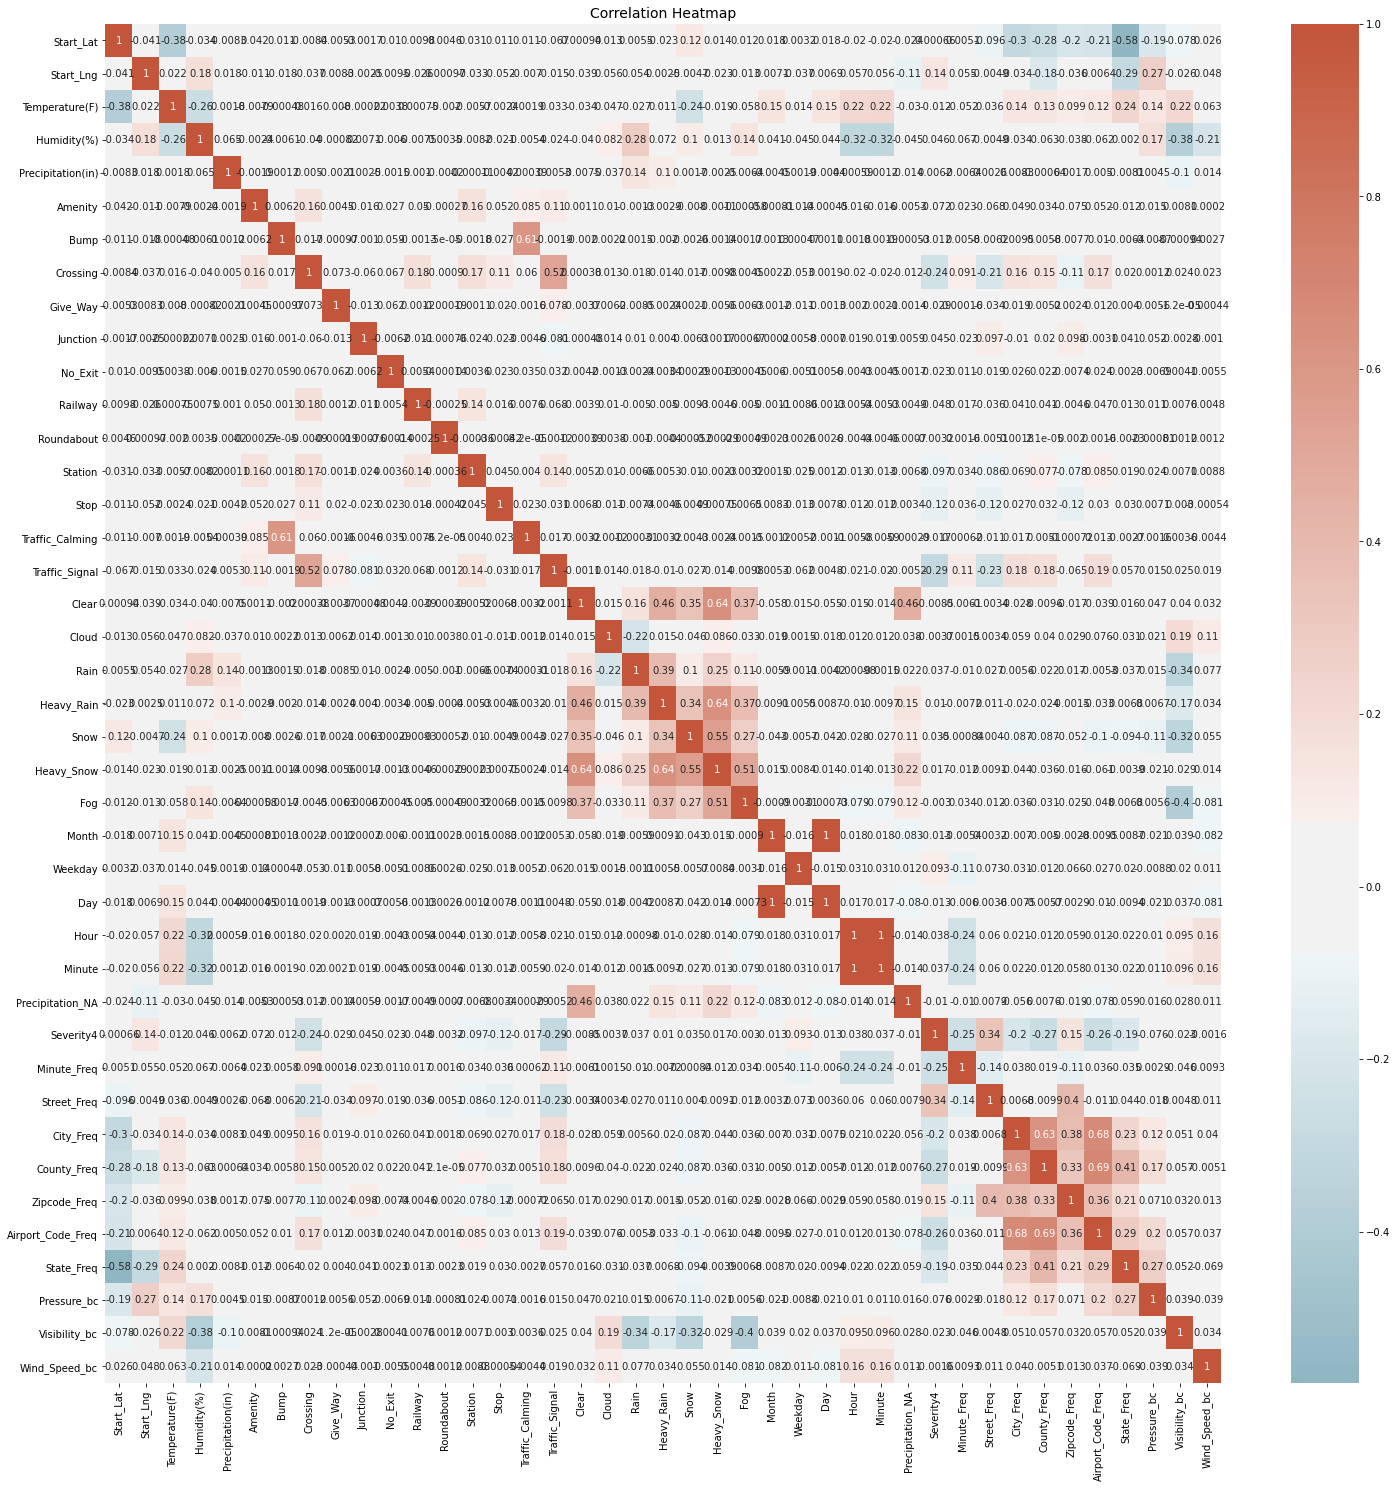

In [53]:
# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

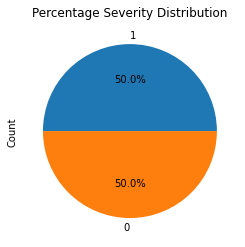

In [54]:
# Plot the proportion of severities.
plt.figure()
df_bl['Severity4'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage Severity Distribution')
plt.ylabel('Count')
plt.show()

In [55]:
df = df.drop(['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Precipitation_NA','Visibility_bc', 'Wind_Speed_bc',
              'Clear','Cloud','Snow','Crossing','Junction','Railway','Month',
              'Hour', 'Day','Minute', 'City_Freq','County_Freq','Airport_Code_Freq','Zipcode_Freq',
              'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night'], axis=1)

In [56]:
df = df.drop(['Timezone'], axis=1)

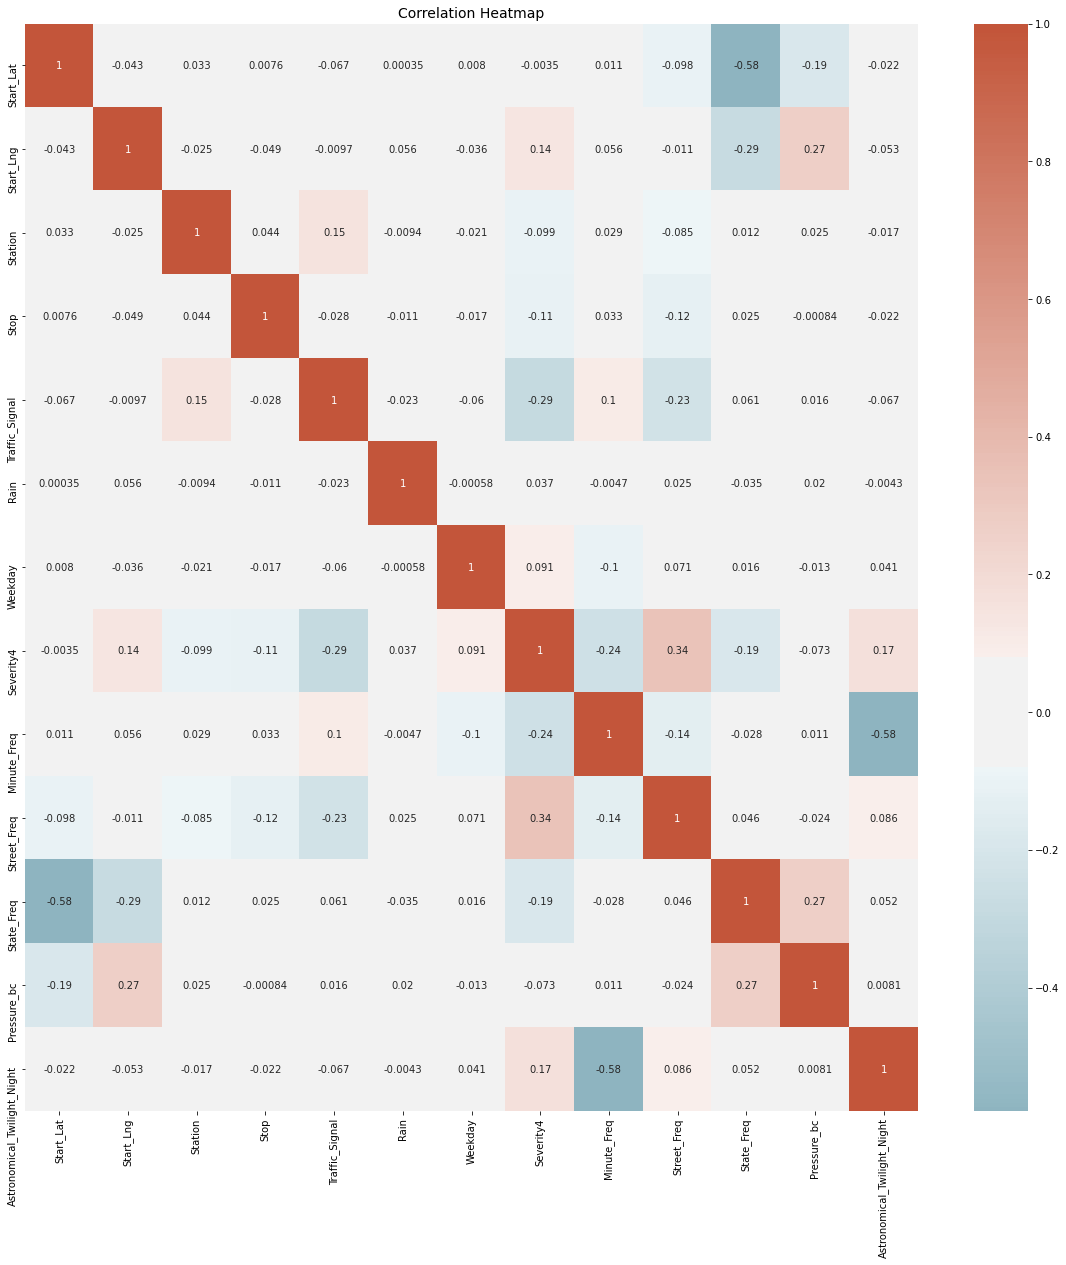

In [57]:
# resample again
df_bl = resample(df, 'Severity4', 50000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [58]:
# Pre-process the dataset to extract the most important features to predict the severity of an accident
# Find all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
print('The Dataset Contains, Continuous Variables: {}'.format(continuous_vars))

# Find all categorical variables
categorical_vars = df.select_dtypes(include=['object', 'bool', 'category']).columns
print('The Dataset Contains, Categorical Variables: {}'.format(categorical_vars))

The Dataset Contains, Continuous Variables: Index(['Start_Lat', 'Start_Lng', 'Weekday', 'Severity4', 'Minute_Freq',
       'Street_Freq', 'State_Freq', 'Pressure_bc'],
      dtype='object')
The Dataset Contains, Categorical Variables: Index(['Station', 'Stop', 'Traffic_Signal', 'Rain'], dtype='object')


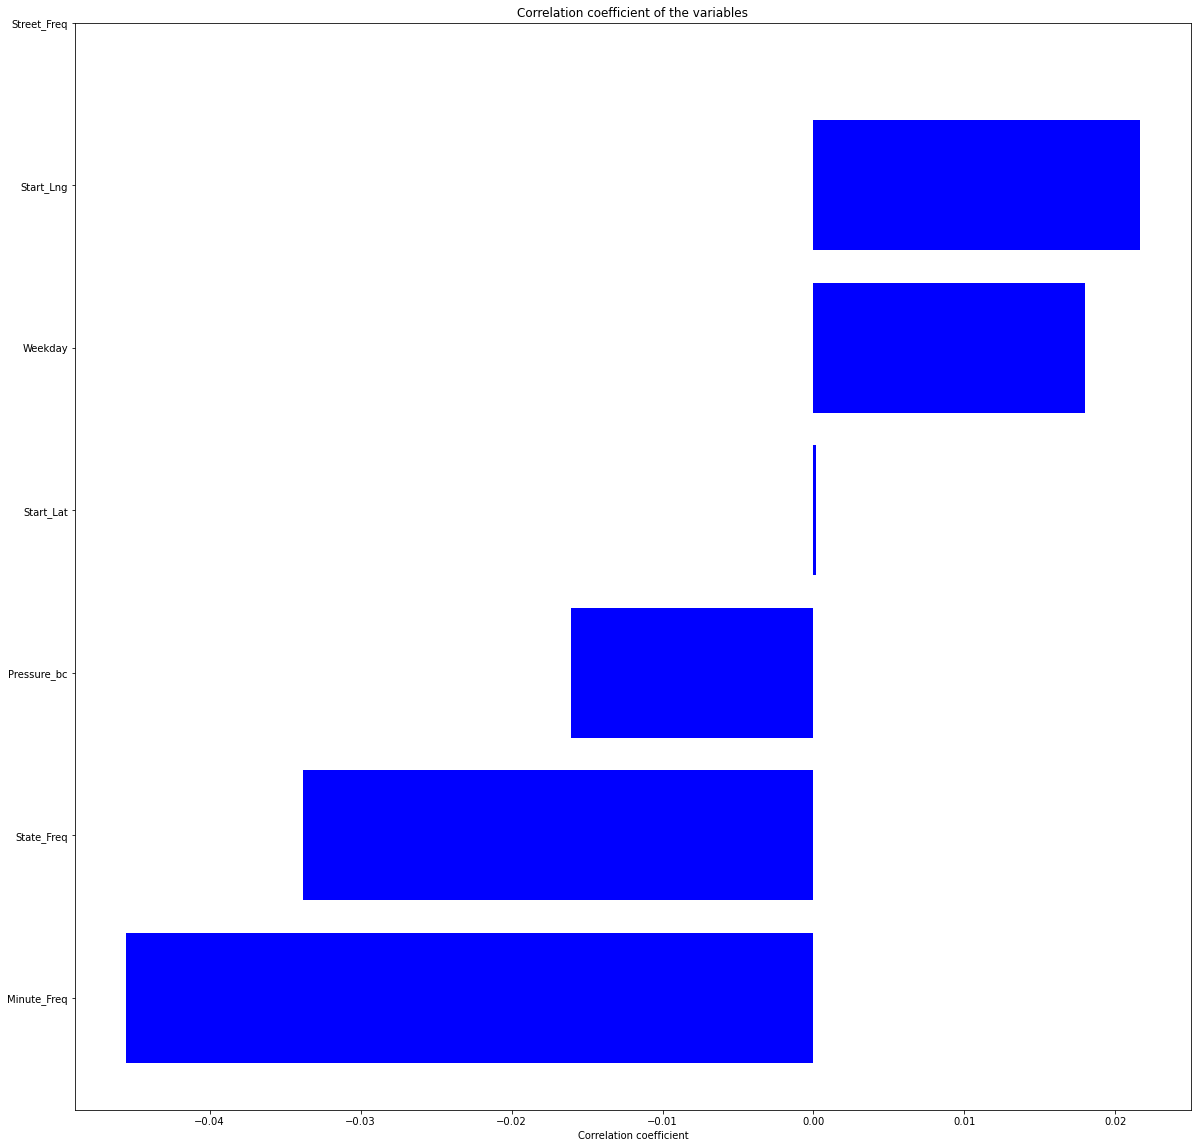

In [59]:
labels = []
values = []
for col in continuous_vars:
    if col == 'Severity4':
        continue
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.Severity4.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(20,20))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression  # You can use other models depending on your problem.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(df_bl.drop('Severity4', axis=1), df_bl['Severity4'], test_size=0.2, random_state=42)

In [61]:
x_train.head()

,Start_Lat,Start_Lng,Station,Stop,Traffic_Signal,Rain,Weekday,Minute_Freq,Street_Freq,State_Freq,Pressure_bc,Astronomical_Twilight_Night
1302632,35.464378,-97.719765,False,False,False,False,3,0.802109,0.668752,0.749092,5.873072,0
1133917,42.527187,-88.975090,False,False,False,False,0,0.097263,3.121812,0.272855,5.896361,1
1205108,41.574196,-87.507942,False,False,False,False,4,1.291225,6.318384,0.354639,5.940697,0
2108243,39.801861,-104.984962,False,False,False,False,2,0.106887,1.972232,0.562143,5.424910,1
1531867,41.250751,-74.232338,False,False,False,False,3,0.625252,0.185614,1.147152,5.959026,0


In [62]:
my_imputer = SimpleImputer()
x_train = my_imputer.fit_transform(x_train)

In [63]:
# Perform PCA analysis with Skree plot to find the most important features
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train)
df_scaled

array([[-0.1318969 , -0.54043853, -0.11471005, ..., -0.64507533,
        -0.53408433, -0.45541341],
       [ 1.3545937 ,  0.07409888, -0.11471005, ..., -1.48573486,
        -0.33632918,  2.19580712],
       [ 1.15402022,  0.17720361, -0.11471005, ..., -1.34136983,
         0.04012994, -0.45541341],
       ...,
       [ 1.88255564, -0.20056429, -0.11471005, ..., -0.84904212,
        -0.12405327, -0.45541341],
       [-0.13582359,  0.66194246, -0.11471005, ...,  0.38489141,
         0.06351958, -0.45541341],
       [ 0.76279575, -1.10101833, -0.11471005, ..., -0.97508044,
        -7.15342023, -0.45541341]])

(80000, 12)


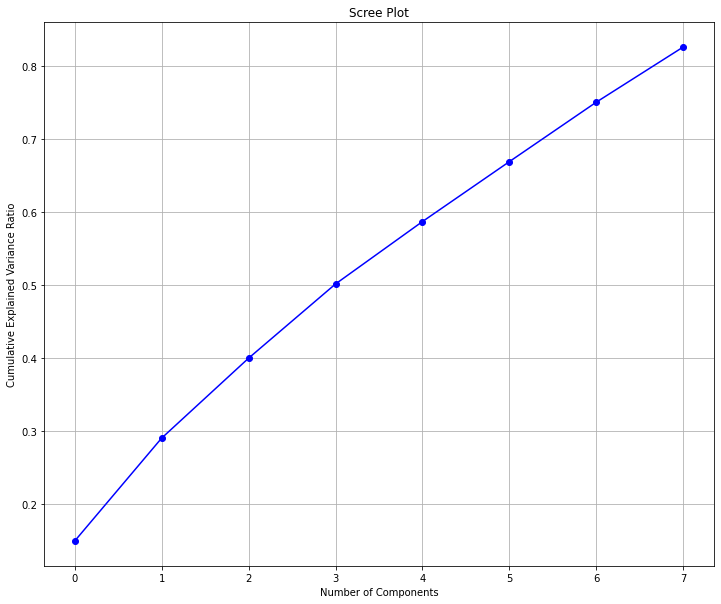

In [64]:
print(x_train.shape)
# Perform PCA
pca = PCA(n_components=8)
df_pca = pca.fit_transform(df_scaled)

# Plot the Skree plot
plt.figure(figsize=(12, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [65]:
x_test = my_imputer.fit_transform(x_test)
df_scaled_test = scaler.transform(x_test)
df_pca_test = pca.transform(df_scaled_test)
df_pca_test

array([[ 1.46171523, -0.87764225, -0.95830288, ...,  0.00849669,
         0.70445647,  0.26720107],
       [ 0.95568501, -2.20310723,  0.94360669, ..., -0.40656018,
         0.29628615, -0.07981764],
       [ 1.2429499 , -0.47961143,  1.30744193, ..., -0.42355021,
        -0.18037162,  1.00775466],
       ...,
       [ 0.28479101,  2.28565848,  0.40517408, ..., -0.51613738,
        -0.04497607,  0.12019289],
       [-0.50060897, -0.13212496,  0.24386486, ..., -0.40652939,
        -0.75482035,  0.09272638],
       [-0.29852408,  0.28065159,  0.73873117, ..., -0.59208799,
         0.88258565, -0.49542319]])

In [66]:
# Initialize and train a machine learning model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      9965
           1       0.72      0.77      0.74     10035

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



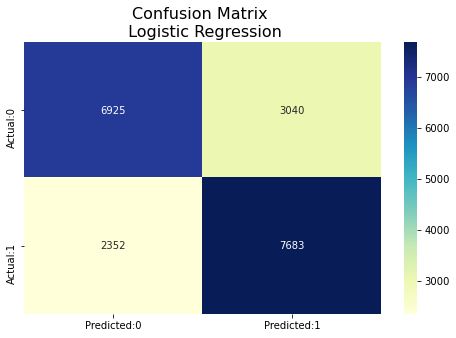

In [68]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Logistic Regression", fontsize=16)
plt.show()

In [69]:
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100],
        'max_features': ['auto','sqrt']}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_test)

print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9965
           1       0.90      0.98      0.94     10035

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



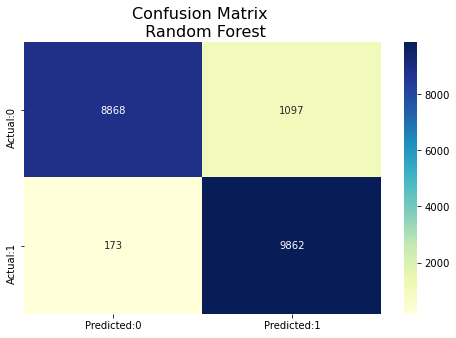

In [70]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

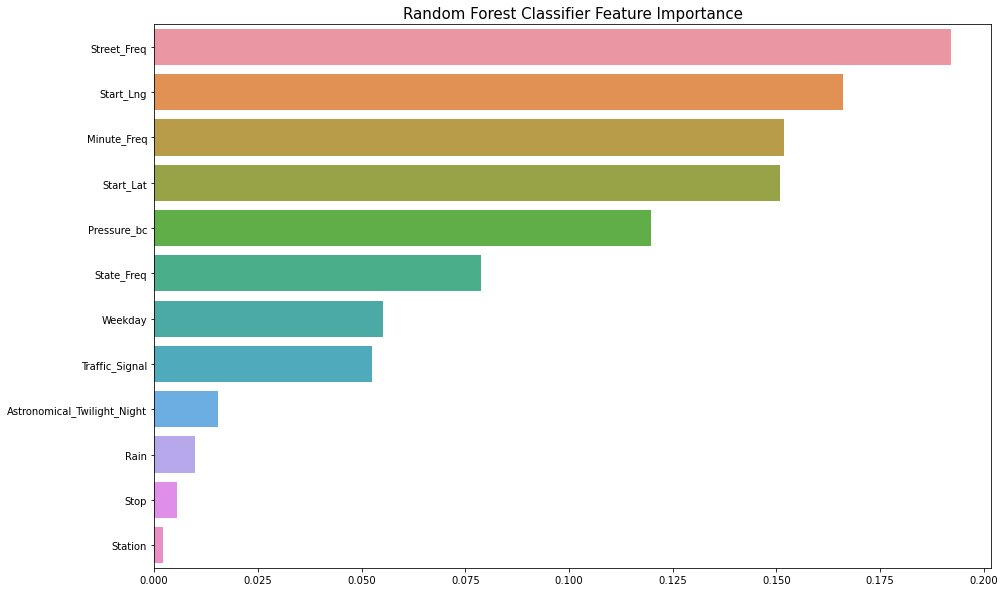

In [71]:
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity4',axis=1).columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()